<a href="https://colab.research.google.com/github/FLjv77/ML_Physics/blob/main/MachineLearningInPhysics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# An Algorithm for Clustering

Input Params:


*   Dataset
*   Metrics
*   Score function (seems be fixed)
*   Number of clusters range

Output:


*   Best clusters and it's score




In [ ]:
# for each possible number of cluster as c_n
# select c_n point randomly
# find nearest point according metric in each cluster
# update cluster center by metric avarage of the nodes in same cluster
# do this untill all nodes covered
# calculate score of clustering
#
#
# FOR EXAMPLE
# metric         => aghlidosian distance, relative entropy of coherence, tangle
# score function => distance of cluster from each other / density data in each cluster

###Algorithm Structure

In [113]:
def clustring(dataset, calculateMetric, getScore, clusterRange):
  score = 0
  best_cluster = []
  for num_c in range(clusterRange):
    ### init cluster centers
    remain_data = dataset
    index_centers = np.random.randint(0, len(dataset)-1, num_c+1)
    clusters = []
    for i, center in enumerate(index_centers):
      clusters.append({
          'center': remain_data[center],
          'members': [],
          'label': i
      })
    remain_data = np.delete(remain_data, index_centers, axis=0)
    ### cover all data
    while(len(remain_data) > 0):
      ### add a member to each cluster
      for cluster in clusters:
        center = cluster['center']
        nearest_dis = np.iinfo(np.int64).max
        nearest_index = -1

        ### finr nearest data to center
        for index, data in enumerate(remain_data):
          if calculateMetric(data, center) < nearest_dis:
            nearest_index = index


        cluster['members'].append(remain_data[nearest_index])
        remain_data = np.delete(remain_data, nearest_index, axis=0)

        ### update center of cluster
        cluster['center'] = np.mean(cluster['members'], axis=0)

        if len(remain_data) == 0:
          break;

    ### check score cluster
    if(score < getScore(clusters)):
      best_cluster = clusters

  return best_cluster

###Test Algorithm for sample of date

In [107]:
def euclideanMetric(p1, p2):
  return np.sqrt(np.sum(np.power((p1 - p2), 2)))

def getScore(clusters):
  score = 0
  for c in clusters:
    internal_dis = 0
    external_dis = 0
    member_cluster = c['members']
    for d1 in member_cluster:
      for d2 in member_cluster:
        if not(np.array_equal(d1, d2)):
          internal_dis = internal_dis + euclideanMetric(d1, d2)
    for cc in clusters:
      center_c = c['center']
      center_cc = cc['center']
      if not(np.array_equal(center_c, center_cc)):
        external_dis = external_dis + euclideanMetric(center_c, center_cc)
    score = score + external_dis / internal_dis
  return score


In [114]:
# Generate 300 samples with 3 clusters
data, y = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)
clusters = clustring(data, euclideanMetric, getScore, 3)

<ipython-input-115-ac8f2b3f8692>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_member[:, 0], cluster_member[:, 1], c=label, cmap='viridis', edgecolors='k')


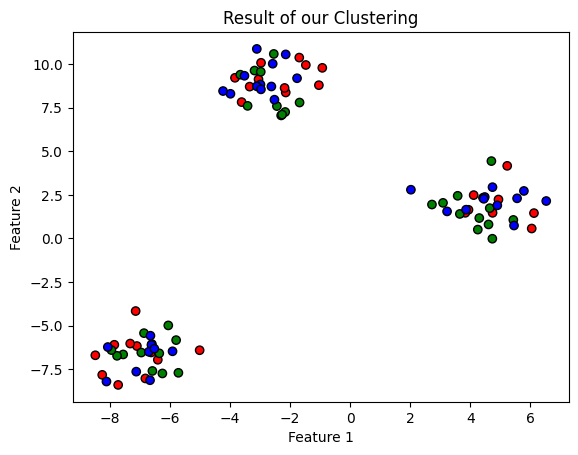

In [115]:
colors = ['r', 'g', 'b']
for cluster in clusters:
  cluster_member = np.array(cluster['members'])
  label = np.full(len(cluster_member), colors[cluster['label']])
  plt.scatter(cluster_member[:, 0], cluster_member[:, 1], c=label, cmap='viridis', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Result of our Clustering")
plt.show()